In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
# conv_base=tf.keras.applications.VGG16(

#     include_top = False,
#     input_shape=(150,150,3)
# )

In [3]:
# conv_base.trainable=False
# conv_base.summary(show_trainable=True)

In [4]:
# for layer in conv_base.layers[:-4]:
#   layer.trainable=False

In [5]:
# conv_base.summary(show_trainable=True)

In [6]:
# model = Sequential()
# model.add(tf.keras.Input(shape=(150, 150, 3)))
# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(256,activation='relu'))
# model.add(Dense(10,activation='sigmoid'))


In [7]:
# model.summary(show_trainable=True)

In [8]:
# import keras

# vgg16_model = keras.applications.VGG16(input_shape = (32, 32, 3), include_top = False)

# # Build a new model based on pre-trained VGG16
# inputs = vgg16_model.inputs
# x = vgg16_model.output
# # x = keras.layers.GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
# outputs = Dense(2, activation = 'softmax')(x)
# model = Model(inputs, outputs, name = 'transfer_learning')
# model.summary(show_trainable = True)

In [9]:

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.layers import Flatten, Dense
# from tensorflow.keras.models import Model

# # Load VGG16 with pretrained weights of the feature extractor (or backbone or Convolutional block) and without the head i.e., dense layers.
# vgg16_model = vgg16.VGG16(input_shape = (224, 224, 3), include_top = False)

# # Build a new model based on pre-trained VGG16
# inputs = vgg16_model.inputs
# x = vgg16_model.output
# x = Flatten()(x)
# x = Dense(256, activation = 'relu')(x)
# outputs = Dense(10, activation = 'softmax')(x)
# model = Model(inputs, outputs, name = 'NewClassifier')
# model.summary(show_trainable = True)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
import cv2
from keras import Sequential

In [11]:
(x_train,y_train),(x_test,y_test) =keras.datasets.mnist.load_data()

In [12]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

y_train=tf.keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [13]:
geometric= tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=13,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.3,
    zoom_range=0.3,
    brightness_range =[0.8,1.2]
        )

In [14]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_train[:50000]])
geo_augment_labels=y_train[:50000]

augmented_train_images = np.concatenate([
    x_train,
    geo_augmented_images

])

augmented_y_train = np.concatenate([
    y_train,
    geo_augment_labels

])


In [15]:
print(len(augmented_y_train))

110000


In [16]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_test[:5000]])
geo_augment_labels=y_test[:5000]

augmented_test_images = np.concatenate([
    x_test,
    geo_augmented_images

])

augmented_y_test = np.concatenate([
    y_test,
    geo_augment_labels

])


In [17]:
y_test1=augmented_y_test
y_train1=augmented_y_train
x_test1=augmented_test_images
x_train1=augmented_train_images

In [18]:
len(x_train1)

110000

Text(0.5, 1.0, '5')

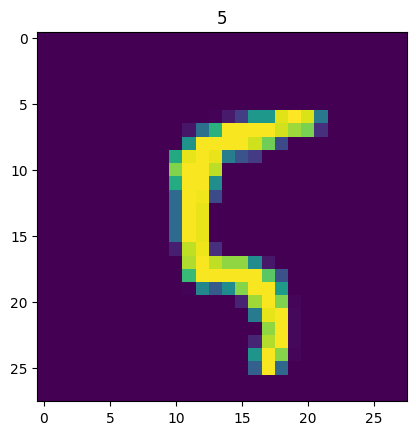

In [19]:
plt.imshow(x_train1[100])
plt.title(f'{np.argmax(y_train1[100])}')

In [20]:
x_train1=x_train1/255
x_test1=x_test1/255

x_train=x_train/255
x_test=x_test/255


In [21]:
len(x_test1)

15000

In [22]:

input =keras.Input(shape=(28,28,1))
x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

model =keras.Model(input,output)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0     

In [23]:
print('augment train data shape ',x_train1.shape)
print('augment test data shape ',x_test1.shape)
# x_train.shape
# x_test.shape

augment train data shape  (110000, 28, 28, 1)
augment test data shape  (15000, 28, 28, 1)


In [24]:
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5)

In [25]:
history=model.fit(x_train,y_train,epochs=111,validation_split=0.2,callbacks=[early_stop])

Epoch 1/111
1500/1500 [==============================] - 24s 14ms/step - loss: 0.4691 - accuracy: 0.8750 - val_loss: 0.1591 - val_accuracy: 0.9540
Epoch 2/111
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1316 - accuracy: 0.9606 - val_loss: 0.1104 - val_accuracy: 0.9694
Epoch 3/111
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0924 - accuracy: 0.9723 - val_loss: 0.0887 - val_accuracy: 0.9749
Epoch 4/111
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0785 - val_accuracy: 0.9783
Epoch 5/111
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.0646 - val_accuracy: 0.9811
Epoch 6/111
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0639 - val_accuracy: 0.9813
Epoch 7/111
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0

Text(0, 0.5, 'loss')

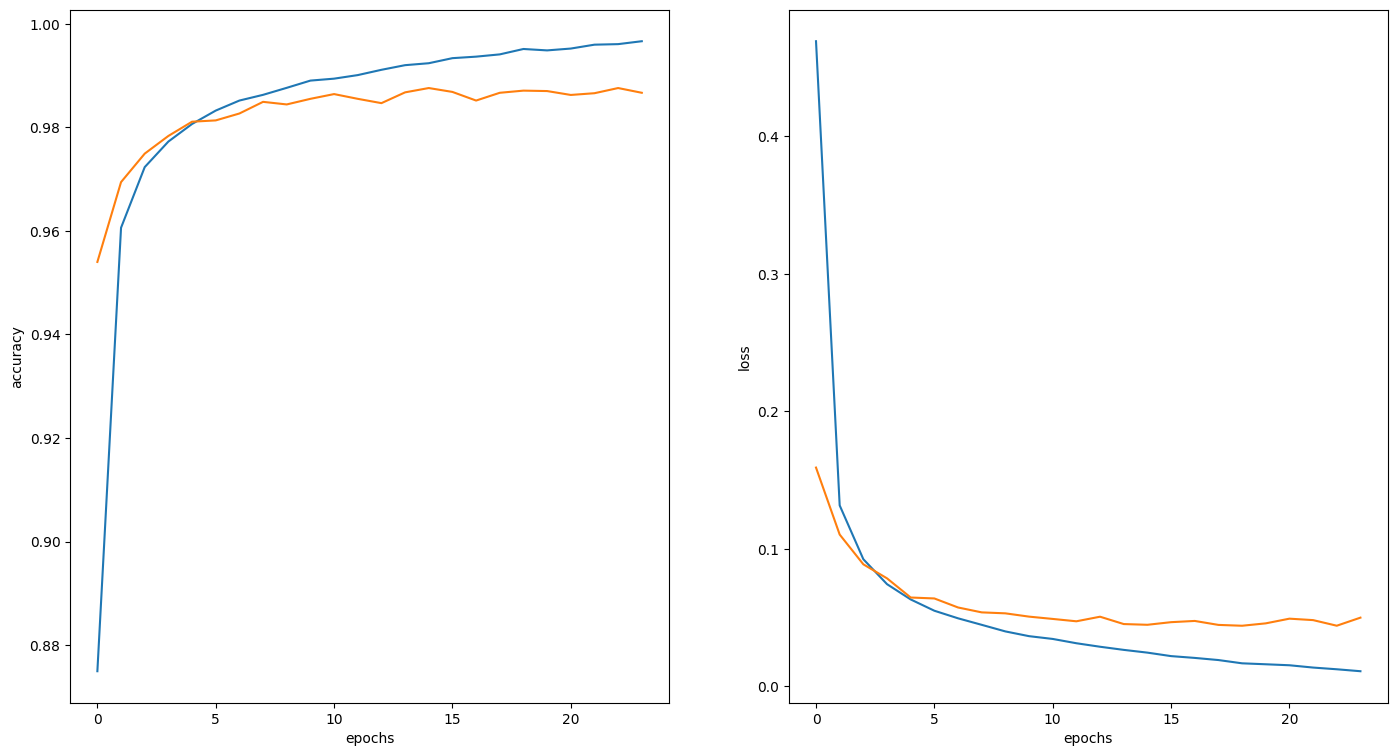

In [26]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [27]:

input =keras.Input(shape=(28,28,1))
x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

augment_model =keras.Model(input,output)
augment_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0   

In [28]:
augment_model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history1=augment_model.fit(x_train1,y_train1,epochs=111,validation_split=0.2, callbacks=[early_stop])

Epoch 1/111
2750/2750 [==============================] - 40s 14ms/step - loss: 0.6904 - accuracy: 0.7916 - val_loss: 0.9137 - val_accuracy: 0.7100
Epoch 2/111
2750/2750 [==============================] - 33s 12ms/step - loss: 0.3189 - accuracy: 0.9028 - val_loss: 0.6782 - val_accuracy: 0.7901
Epoch 3/111
2750/2750 [==============================] - 38s 14ms/step - loss: 0.2476 - accuracy: 0.9254 - val_loss: 0.5863 - val_accuracy: 0.8148
Epoch 4/111
2750/2750 [==============================] - 33s 12ms/step - loss: 0.2075 - accuracy: 0.9374 - val_loss: 0.5257 - val_accuracy: 0.8347
Epoch 5/111
2750/2750 [==============================] - 37s 13ms/step - loss: 0.1816 - accuracy: 0.9450 - val_loss: 0.4516 - val_accuracy: 0.8581
Epoch 6/111
2750/2750 [==============================] - 38s 14ms/step - loss: 0.1612 - accuracy: 0.9510 - val_loss: 0.4097 - val_accuracy: 0.8737
Epoch 7/111
2750/2750 [==============================] - 39s 14ms/step - loss: 0.1450 - accuracy: 0.9565 - val_loss: 0

Text(0, 0.5, 'loss')

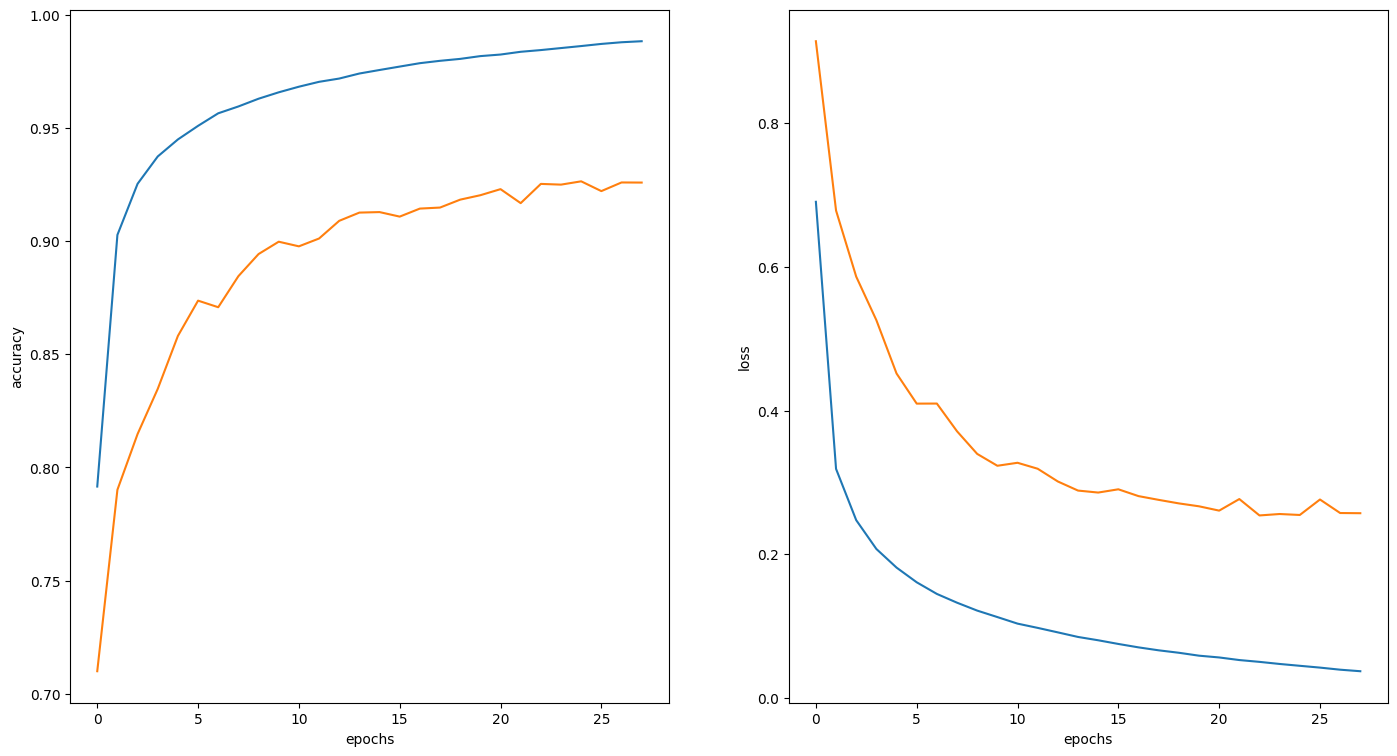

In [29]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [30]:
loss,accuracy=model.evaluate(x_test,y_test)
loss3,accuracy3=model.evaluate(x_test1,y_test1)

loss2,accuracy2=augment_model.evaluate(x_test,y_test)
loss2,accuracy1=augment_model.evaluate(x_test1,y_test1)

print(accuracy)
print(accuracy3)

print(accuracy2)
print(accuracy1)

469/469 [==============================] - 4s 8ms/step - loss: 0.1262 - accuracy: 0.9640
0.9886000156402588
0.8245333433151245
0.9901999831199646
0.9639999866485596
